In [11]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from google.colab import drive
import random
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import layers, initializers, regularizers, Model, Input
from tensorflow.keras import losses, metrics, optimizers, callbacks
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import tensorflow_datasets as tfds
import tensorflow as tf
import logging

class PlantVillage(tfds.core.GeneratorBasedBuilder):
    """PlantVillage dataset."""

    VERSION = tfds.core.Version('1.0.0')
    RELEASE_NOTES = {
        '1.0.0': 'Initial release.',
    }

    def _info(self):
      return tfds.core.DatasetInfo(
          builder=self,
          description="A dataset of images of plants, organized by species and conditions.",
          features=tfds.features.FeaturesDict({
              "image": tfds.features.Image(),
              "label": tfds.features.ClassLabel(names=[
                  'Apple___Apple_scab',
                  'Apple___Black_rot',
                  'Apple___Cedar_apple_rust',
                  'Apple___healthy',
                  'Blueberry___healthy',
                  'Cherry_(including_sour)___healthy',
                  'Cherry_(including_sour)___Powdery_mildew',
                  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                  'Corn_(maize)___Common_rust_',
                  'Corn_(maize)___healthy',
                  'Corn_(maize)___Northern_Leaf_Blight',
                  'Grape___Black_rot',
                  'Grape___Esca_(Black_Measles)',
                  'Grape___healthy',
                  'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                  'Orange___Haunglongbing_(Citrus_greening)',
                  'Peach___Bacterial_spot',
                  'Peach___healthy',
                  'Pepper,_bell___Bacterial_spot',
                  'Pepper,_bell___healthy',
                  'Potato___Early_blight',
                  'Potato___healthy',
                  'Potato___Late_blight',
                  'Raspberry___healthy',
                  'Soybean___healthy',
                  'Squash___Powdery_mildew',
                  'Strawberry___healthy',
                  'Strawberry___Leaf_scorch',
                  'Tomato___Bacterial_spot',
                  'Tomato___Early_blight',
                  'Tomato___healthy',
                  'Tomato___Late_blight',
                  'Tomato___Leaf_Mold',
                  'Tomato___Septoria_leaf_spot',
                  'Tomato___Spider_mites Two-spotted_spider_mite',
                  'Tomato___Target_Spot',
                  'Tomato___Tomato_mosaic_virus',
                  'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
              ]),
          }),
          supervised_keys=("image", "label"),
    )


    def _split_generators(self, dl_manager):
        # Assuming `plant_village_path` is the path to the dataset directory
        plant_village_path = os.path.join('/content/drive/My Drive/PlantVillageShuffle')
        return [
            tfds.core.SplitGenerator(
                name=tfds.Split.TRAIN,
                gen_kwargs={"path": os.path.join(plant_village_path, 'train')},
            ),
            tfds.core.SplitGenerator(
                name=tfds.Split.VALIDATION,
                gen_kwargs={"path": os.path.join(plant_village_path, 'val')},
            ),
        ]

    def _generate_examples(self, path):
              """Yields examples."""
              for label in os.listdir(path):
                  label_dir = os.path.join(path, label)
                  if os.path.isdir(label_dir):
                      for img_file in os.listdir(label_dir):
                          if img_file.lower().endswith('.jpg'):
                              img_path = os.path.join(label_dir, img_file)
                              key = img_path
                              # Log every image path being processed
                              logging.info(f"Processing image: {img_path}, Label: {label}")
                              yield key, {
                                  'image': img_path,
                                  'label': label,
                              }

In [4]:
# Instantiate your dataset builder directly
builder = PlantVillage()

# Download and prepare the dataset
builder.download_and_prepare()
print(builder.is_prepared())

# Load the dataset splits
train = builder.as_dataset(split='train[:70%]', as_supervised=True)
val = builder.as_dataset(split='train[70%:80%]', as_supervised=True)
test = builder.as_dataset(split='train[80%:]', as_supervised=True)

# If you need the dataset info
t_info = builder.info

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/54303 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/1.0.0.incompleteTR495Z/plant_village-train.tfrecord*...:   0…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/1.0.0.incompleteTR495Z/plant_village-validation.tfrecord*...…

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.0. Subsequent calls will reuse this data.
True


In [5]:
# To ensure reproducible results (as much as possible)
tf.keras.utils.set_random_seed(1234)

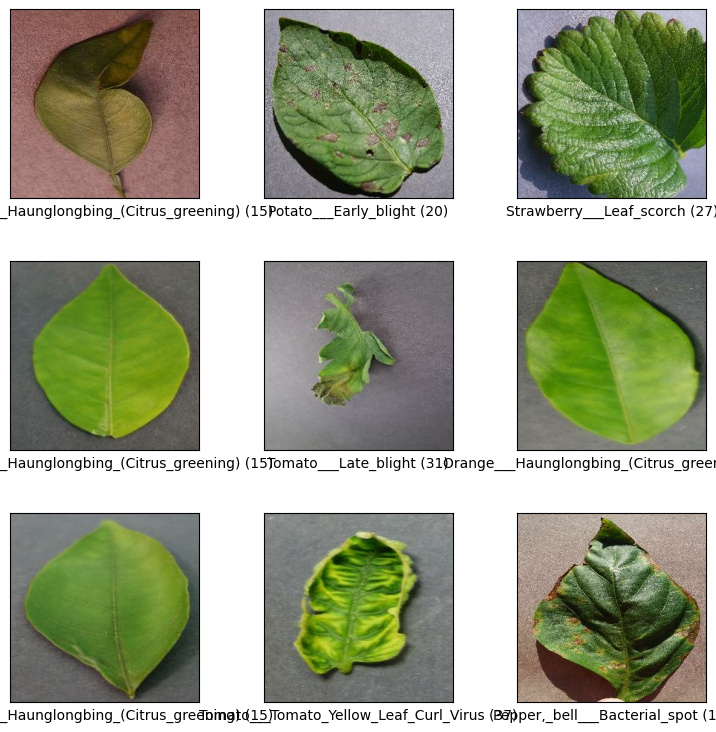

In [6]:
# delete cell block for final submission
fig = tfds.show_examples(train, t_info)

In [7]:
classes = t_info.features['label'].names

mapped_cats = {name: i for i, name in enumerate(classes)}

vals = np.unique(np.fromiter(train.map(lambda x, y: y), float), return_counts=True)

frequency_of_classes = pd.DataFrame()
frequency_of_classes['Class'], frequency_of_classes['Frequency'] = mapped_cats.keys(), vals[1]
frequency_of_classes

,Class,Frequency
0,Apple___Apple_scab,357
1,Apple___Black_rot,354
2,Apple___Cedar_apple_rust,157
3,Apple___healthy,942
4,Blueberry___healthy,844
5,Cherry_(including_sour)___healthy,498
6,Cherry_(including_sour)___Powdery_mildew,606
7,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,310
8,Corn_(maize)___Common_rust_,699
9,Corn_(maize)___healthy,651


In [ ]:
def casting(image, label):
  image = tf.image.resize(image, (100, 100))
  image = tf.cast(image, tf.float32) / 255
  label = tf.cast(label, tf.float32)
  return image, label

train = train.map(casting).batch(12)
val = val.map(casting).batch(12)
test = test.map(casting)

In [ ]:
from tensorflow.keras import layers, Model
reps_121 = [6, 12, 24, 16]
reps_169 = [6, 12, 32, 32]
reps_201 = [6, 12, 48, 32]
reps_264 = [6, 12, 64, 48]

# Depthwise Separable Convolution Block
def DepthwiseSeparableConvBlock(x, filters, kernel_size=3, strides=1):
    x = layers.DepthwiseConv2D(kernel_size=kernel_size, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters=filters, kernel_size=1, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

# Squeeze-and-Excitation Block
def SEBlock(input_tensor, reduction_ratio=16):
    ch_input = input_tensor.shape[-1]
    x = layers.GlobalAveragePooling2D()(input_tensor)
    x = layers.Dense(ch_input // reduction_ratio, activation='relu')(x)
    x = layers.Dense(ch_input, activation='sigmoid')(x)
    x = layers.Reshape((1, 1, ch_input))(x)
    x = layers.Multiply()([input_tensor, x])
    return x

# Dense Block with Dropout and SE Block
def DenseBlockWithSEAndDropout(x_0, reps, filters, dropout_rate=0.2):
    for i in range(reps):
        x = DepthwiseSeparableConvBlock(x_0, 4*filters)
        x = layers.Dropout(dropout_rate)(x)  # Adding dropout
        x = DepthwiseSeparableConvBlock(x, filters, 3)
        x = SEBlock(x)  # Adding SE Block
        x = layers.Dropout(dropout_rate)(x)  # Adding dropout
        x_0 = layers.Concatenate()([x_0, x])
    return x_0

# Transition Layer with Average Pooling
def TransitionLayer(x):
    x = DepthwiseSeparableConvBlock(x, int(x.shape[-1] // 2))
    x = layers.AveragePooling2D(2, strides=2, padding='same')(x)
    return x

# Define the DenseNet Model
def DenseNet(repetitions=reps_121):
    n_classes = 38
    inp = layers.Input(shape=(100, 100, 3))

    # Initial Convolution
    x = layers.Conv2D(filters=32, kernel_size=7, strides=2, padding='same')(inp)

    # Inception-style MaxPooling
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Dense Blocks and Transition Layers
    for i in range(4):
        x = DenseBlockWithSEAndDropout(x, repetitions[i], 32)
        if i < 3:  # Skip transition layer after the last dense block
            x = TransitionLayer(x)

    # Classification Layer
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=inp, outputs=x)
    return model

# Create model instance
model = DenseNet()

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
performance = model.fit(train, epochs=2, validation_data = val)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.rcParams['figure.figsize'] = [18, 12]
tf.keras.utils.set_random_seed(1)

# Random element from test-set
test_example = test.batch(1).shuffle(1000).take(1)
for img, label in test_example:
    pass  # img and label are now the tensors holding our image and label

# Image showing
plt.subplot(1, 3, 1)
plt.imshow(img[0])
plt.title('Original Image')
plt.axis('off')

# Gradient computation
with tf.GradientTape() as tape:
    tape.watch(img)
    out = model(img, training=False)  # Make sure the model is in inference mode
    score = out[0, tf.argmax(out, axis=1)[0]]

gradients = tf.abs(tape.gradient(score, img))

# We now sum the absolute values of the computed gradients for all the three dimensions of the image
v_saliency_map = tf.reduce_sum(gradients[0], axis=-1)  # Summing across channels

# Saliency map showing
plt.subplot(1, 3, 2)
plt.imshow(v_saliency_map, cmap='viridis')
plt.title('Vanilla Saliency Map')
plt.axis('off')

# Overlapping in order to see the effectiveness of our saliency map
plt.subplot(1, 3, 3)
plt.imshow(img[0], cmap='binary')
plt.imshow(v_saliency_map, cmap='viridis', alpha=0.5)
plt.title('Overlapped Vanilla Saliency Map')
plt.axis('off')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Helper function to get the model's last convolutional layer
def get_last_conv_layer_name(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise Exception("Convolution layer not found")

last_conv_layer_name = get_last_conv_layer_name(model)

# Model modification for Grad-CAM
grad_model = tf.keras.models.Model(
    [model.inputs],
    [model.get_layer(last_conv_layer_name).output, model.output])

# Select a sample from the dataset
for img, label in test.batch(1).shuffle(1000).take(1):
    pass

# Grad-CAM process
with tf.GradientTape() as tape:
    tape.watch(img)
    conv_outputs, predictions = grad_model(img)  # Forward pass
    class_idx = tf.argmax(predictions[0])  # Get predicted class index
    loss = predictions[:, class_idx]

# Gradients
grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Weighting the outputs with the computed gradients
heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs[0]), axis=-1)

# ReLU activation of heatmap
heatmap = tf.maximum(heatmap, 0)
heatmap /= tf.math.reduce_max(heatmap)  # Normalize

# Resizing heatmap to the original image size
heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], (100, 100))
heatmap_resized = heatmap_resized[..., 0]

# Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img[0])
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(heatmap_resized, cmap='viridis')
plt.title("Grad-CAM")
plt.axis("off")

# Superimposing the heatmap with the original image
plt.subplot(1, 3, 3)
plt.imshow(img[0])
plt.imshow(heatmap_resized, cmap='viridis', alpha=0.6)  # Overlaying heatmap
plt.title("Grad-CAM Overlay")
plt.axis("off")

plt.show()


In [ ]:
def compute_saliency_map(img, model, class_idx=None):
    with tf.GradientTape() as tape:
        tape.watch(img)
        predictions = model(img)
        if class_idx is None:
            class_idx = tf.argmax(predictions[0])
        loss = predictions[0, class_idx]

    # Compute the gradients of the loss w.r.t the input image
    gradients = tape.gradient(loss, img)
    # Take absolute values of gradients and then max across channels for visualization
    saliency_map = tf.reduce_max(tf.abs(gradients), axis=-1)[0]
    return saliency_map

def smooth_grad(img, model, n_samples=50, noise_level=0.20):
    avg_saliency = 0
    for _ in range(n_samples):
        # Generate noise
        noise = tf.random.normal(shape=tf.shape(img), mean=0.0, stddev=noise_level)
        noisy_img = img + noise

        # Clip the noisy image to maintain valid pixel range [0, 1]
        noisy_img = tf.clip_by_value(noisy_img, clip_value_min=0.0, clip_value_max=1.0)

        # Compute saliency map for the noisy image
        saliency_map = compute_saliency_map(noisy_img, model)
        avg_saliency += saliency_map / n_samples

    return avg_saliency

# Prepare image batch for processing
for img_batch, _ in test.batch(1).take(1):  # Ensure this is how you obtain a batch from your dataset
    img = img_batch  # img should be a batch with a single image

# Compute SmoothGrad saliency map
smooth_saliency_map = smooth_grad(img, model)

# Normalize the saliency map for better visualization
saliency_map_min = tf.reduce_min(smooth_saliency_map)
saliency_map_max = tf.reduce_max(smooth_saliency_map)
smooth_saliency_map_norm = (smooth_saliency_map - saliency_map_min) / (saliency_map_max - saliency_map_min)

# Convert the tensors to numpy arrays for matplotlib if they are in tensor format
original_image = img.numpy()[0]  # Take the first image in the batch and convert to numpy
saliency_map = smooth_saliency_map_norm.numpy()  # Convert to numpy

# Plotting
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

# Original image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')

# SmoothGrad saliency map
plt.subplot(1, 3, 2)
plt.title('SmoothGrad Saliency Map')
plt.imshow(saliency_map, cmap='viridis')
plt.axis('off')

# Overlay of saliency map on the original image
plt.subplot(1, 3, 3)
plt.title('Overlay')
plt.imshow(original_image)
plt.imshow(saliency_map, cmap='viridis', alpha=0.5)  # Overlay with semi-transparency
plt.axis('off')

plt.show()